In [1]:
import adddeps
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
from scipy.stats import norm,normaltest, probplot

import pandas as pd
import sqlalchemy
from collections import defaultdict
import datetime
import importlib
from simulator.magnetic import SimulatorMagnetic
from simulator.models import Client, SimulationAlchemy as Simulation
from tqdm.notebook import tqdm

import multiprocessing
from multiprocessing import Pool, cpu_count

from relaxation.estimators import relaxation_finder_collision
from utils.utils import smoothen, plot_mean_std, concat, df_round_time

import logging
import sys, os
import h5py
import pickle
matplotlib.rcParams["figure.dpi"] = 150
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
client = Client()

In [2]:
items = client.get_simulation_groups(["ER 3.303.snap.lammps"])[:2]
print(len(items))

2


In [3]:
items[0].a

5.0

In [43]:
# items = client.get_simulation_groups(['Ensemble 4.1.lammps'])[:2]
[item.load_df() for item in tqdm(items)];

[item.load_history(keys=["rs","vs"]) for item in tqdm(items)];

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [44]:
item = items[0]
rs = item.history["rs"]

In [45]:
rs.shape

(1000001, 3, 523)

In [82]:
dz = 5.5
filt = (-dz<rs[ti, 2, :]) & (dz>rs[ti, 2, :])
np.sum(filt)

523

In [87]:
item.record_interval * n

5.0

In [ ]:
with open("snap.pkl", "wb") as f:
    f.dump(rs[ti:ti+20000, ])

  0%|          | 0/500 [00:00<?, ?it/s]

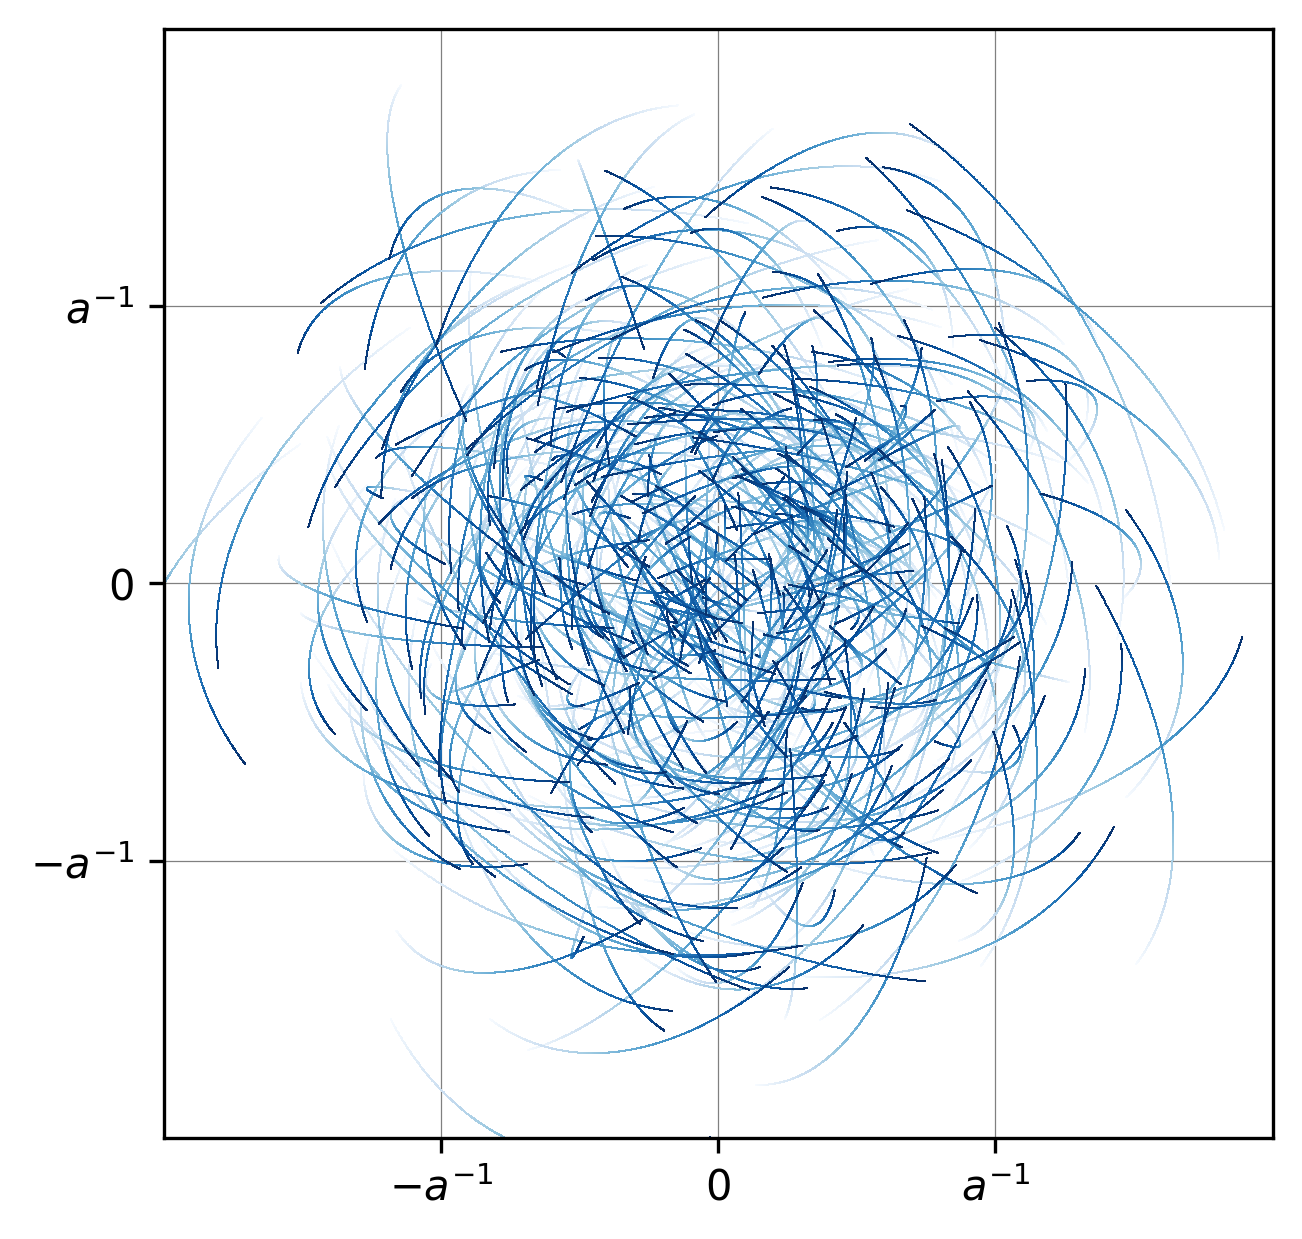

In [90]:
plt.figure(dpi=300)
ti = int(1000001 * 0.9)
n = 500
sp = 1
n = n // sp

a = item.a


ax = plt.gca()
ax.set_aspect("equal")

ax.set_xticks([-a,0, a], ["$-a^{-1}$",0,"$a^{-1}$"])
ax.set_yticks([-a,0, a], ["$-a^{-1}$",0,"$a^{-1}$"])
ka = 2*a
plt.xlim(-ka, ka)
plt.ylim(-ka, ka)

ax.set_axisbelow(True)
plt.grid()
plt.grid(which='major', linestyle='-', linewidth='0.3', color='gray')

norm = mpl.colors.Normalize(vmin=0, vmax=1)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
for i in tqdm(range(n)):
#     plt.plot(rs[ti+sp*i,0, filt], rs[ti+sp*i,1, filt], lw=0, marker=".", ms=0.1, color= cmap.to_rgba(i/n))
    
    plt.scatter(rs[ti+sp*i,0, filt], rs[ti+sp*i,1, filt], s=0.08,alpha=1 ,marker=",",linewidths=0,
                color=cmap.to_rgba(i/n))

In [ ]:
pi = 3

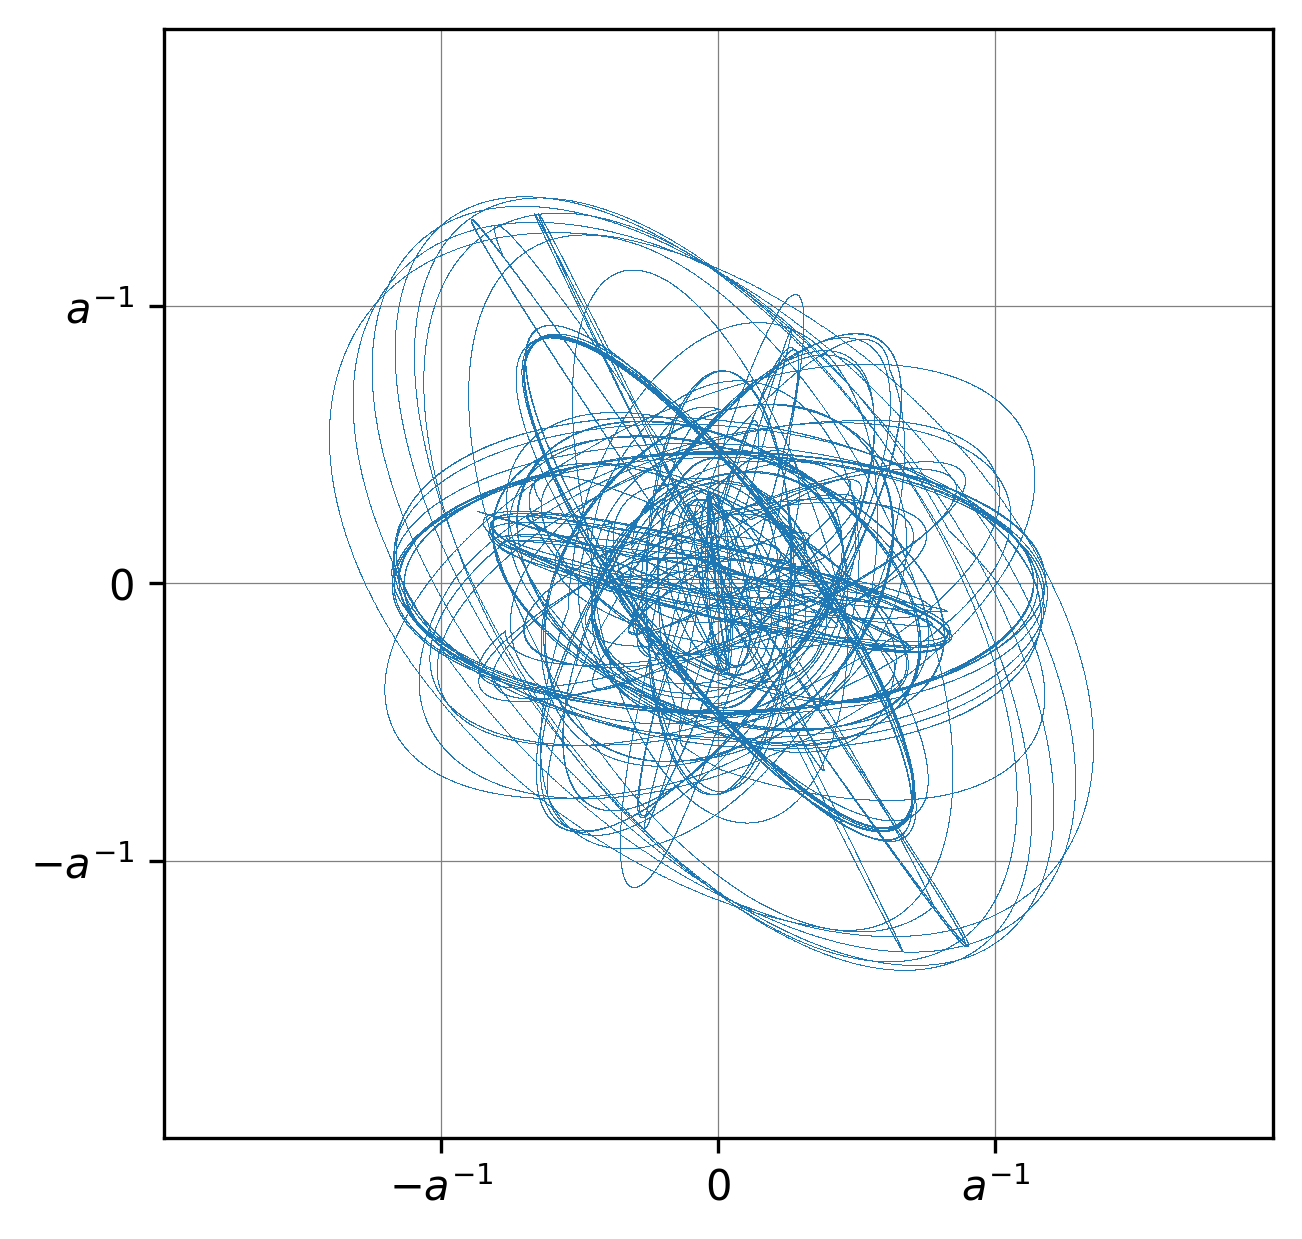

In [111]:
plt.figure(dpi=300)
ti = int(1000001 * 0.6)
n = 5000000
sp = 1


n = n // sp

a = item.a


ax = plt.gca()
ax.set_aspect("equal")

ax.set_xticks([-a,0, a], ["$-a^{-1}$",0,"$a^{-1}$"])
ax.set_yticks([-a,0, a], ["$-a^{-1}$",0,"$a^{-1}$"])
ka = 2*a
plt.xlim(-ka, ka)
plt.ylim(-ka, ka)

ax.set_axisbelow(True)
plt.grid()
plt.grid(which='major', linestyle='-', linewidth='0.3', color='gray')

x = rs[ti::sp,0, pi][:n]
y = rs[ti::sp,1, pi][:n]


norm = mpl.colors.Normalize(vmin=0, vmax=1)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)

plt.plot(x, y, lw=0, marker=",", ms=1)

pi += 1